# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

import numpy as np

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 31367
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

13


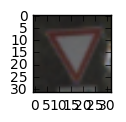

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import random
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

################### My code ###################

#print(train['features'][0])
unique,unique_indices,unique_count = np.unique(y_train, return_index=True, return_counts=True)

#print(unique_indices)
#plt.imshow(X_train[19])

#for i in unique_indices:
#    plt.figure(i + 1)
#    plt.imshow(X_train[i])
#    print(y_train[i])

index = random.randint(0, 43)
#index = 6
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train[index])
    

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [4]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

import tensorflow as tf
EPOCHS = 30
BATCH_SIZE = 128

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

Nothing special for pre-processing the data, just shuffle the training data as done in the LeNet lab.

In [5]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

The Train data supplied inside the pickle doesn't have any validation set so we need to split training data into train data and validation data. A good rule of thumb as per the lectures is to use 20% of the Train data as validation set.

In [7]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 30x30x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Layer 2: Convolutional. Input = 30x30x6. Output = 28x28x12.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 6, 12), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(12))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 28x28x12. Output = 14x14x12.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 3: Convolutional. Output = 12x12x16.
    conv3_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 12, 16), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(16))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b
    
    # Layer 4: Convolutional. Output = 10x10x32.
    conv4_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 16, 32), mean = mu, stddev = sigma))
    conv4_b = tf.Variable(tf.zeros(32))
    conv4   = tf.nn.conv2d(conv3, conv4_W, strides=[1, 1, 1, 1], padding='VALID') + conv4_b
    
    # Activation.
    conv4 = tf.nn.relu(conv4)

    # Pooling. Input = 10x10x32. Output = 5x5x32.
    conv4 = tf.nn.max_pool(conv4, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x32. Output = 800.
    fc0   = flatten(conv4)
    
    # Layer 3: Fully Connected. Input = 800. Output = 240.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(800, 240), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(240))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation
    fc1    = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 240. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(240, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)
    
    ###### (New) Apply Dropout of 0.5 ######
    fc2 = tf.nn.dropout(fc2, 0.5)

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

rate = 0.001

logits = LeNet(x)

prediction = tf.nn.softmax(logits)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

I have used the LeNet architecture to start with but just the LeNet architecture is not enough to properly classify new images as it could easily become overfitted during training.

https://culurciello.github.io/tech/2016/06/04/nets.html
In the above article we can see how LeNet architecture performs compared to other architectures that have been introduced later. With just 2 convolutional layers in the LeNet lab exercise we can see that this architecture is not as sophisticated as other architecures. Although, we do get some good headstart on deep neural network architecture with LeNet.

http://neuralnetworksanddeeplearning.com/chap6.html
In this lecture, Michael Nielsen discusses how dropout can significantly increase the efficiency of the network. By adding a dropout of 0.5 to the final layer immediately improves our LeNet network.

Another set of modification that was done was the addition 2 more convolutional layers. We can see that adding 2 more layers to the base LeNet architecture does improve the accuracy even further. We can observe that the newer architectures like the Inception V3 architecture have many more convolutional layers in the order of 10's (or more). 

Thus, the final architecture has 2 additional convolutional layers and the dropout. I have increased the epochs to 30 (compared to 10 in the LeNet lab) achieving a validation accuracy of 98.3% and a test accuracy of 94% compared to 88% for just the vanila LeNet architecture.


![LeNet Architecture Modified](LeNet_2.jpeg)

Above picture gives the overview of what the modified LeNet architecture looks like with the 2 additional convolutional layers. 

Unlike the vanila LeNet architecture, a new convolutional layer has been inserted after CONV-2 before pooling-1 happens. Another new convolutional layer is added after CONV-3 (originally CONV-2) before pooling-2. In all the Convolutional layers, a stride of 1x1 was used, with padding - VALID which basically doubles the depth of the output layers at each convolutional step. Relu activation was used before each pooling step. Pooling steps use a Kernel size of 1x2x2x1 which reduces the input width and height of the layers by half leaving the depth same.

By the end of 4 convolutional layers, 2 pooling steps, we get a layer with 5x5x32 dimentions. This layer when flattended results in a layer with output 800. Two sets of fully connected layers (with activation followed by each full-connected layer) results in a output of layer with dimention 84. 

A dropout of 50% has been introduced at this stage before the last fully-connected layer that gives an output of 43 which is the number of traffic signs classes we want.

In [8]:
### Train your model here.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'lenet')
    print("Model saved")

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Training...

EPOCH 1 ...
Validation Accuracy = 0.407

EPOCH 2 ...
Validation Accuracy = 0.574

EPOCH 3 ...
Validation Accuracy = 0.700

EPOCH 4 ...
Validation Accuracy = 0.797

EPOCH 5 ...
Validation Accuracy = 0.856

EPOCH 6 ...
Validation Accuracy = 0.886

EPOCH 7 ...
Validation Accuracy = 0.915

EPOCH 8 ...
Validation Accuracy = 0.923

EPOCH 9 ...
Validation Accuracy = 0.939

EPOCH 10 ...
Validation Accuracy = 0.946

EPOCH 11 ...
Validation Accuracy = 0.951

EPOCH 12 ...
Validation Accuracy = 0.949

EPOCH 13 ...
Validation Accuracy = 0.959

EPOCH 14 ...
Validation Accuracy = 0.963

EPOCH 15 ...
Validation Accuracy = 0.966

EPOCH 16 ...
Validation Accuracy = 0.966

EPOCH 17 ...
Validation Accuracy = 0.973

EPOCH 18 ...
Validation Accuracy = 0.975

EPOCH 19 ...
Validation Accuracy = 0.969

EPOCH 20 ...
Validation Accuracy = 0.974

EPOCH 21 ...
Validation Accuracy = 0.949

EPOCH 22 ...
Validation Accuracy = 0.976

EPOCH 23 ...
Validation Accuracy = 0.978

EPOCH 24 ...
Validation Accura

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

Number of epochs was increased from 10 to 30. With epochs of just 10, the maximum validation accuracy achieved was 94.6% but by increasing the epochs to 30 increased the accuracy to 98.3%. We can still continue to increase the epochs but then there is a good possibility of overfitting. Decreasing the number of epochs to 25 would have resulted in an accuracy of 97.7%, which is not too far from 98.3% but an additional 5 epochs sure served a positive result.

The mean was chosen to be 0 and the standard deviation of 0.1. Batch size was kept at 128 based on the lecture slides. The learning rate was kept at 0.001. A different learing rate of 0.01 was tested but during epoch 5 onwards, the accuracy started to drop significantly.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

One of the lessons we have seen earlier - with the web based neural network visualizer, after playing with the visualizer, I have realized that adding more hidden layers to a network does improve the accuracy.

http://neuralnetworksanddeeplearning.com/chap6.html
Also from above book, Michael Nielsen has discussed what he has done to improve the accuracy and I applied some learnings from there.

Another learning was by looking at the Inception architecure here: https://github.com/tensorflow/models/tree/master/inception
We can see how deep the convolutional layers are interconnected to each other so adding couple of convolutional layers to our LeNet architecture did help a lot.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

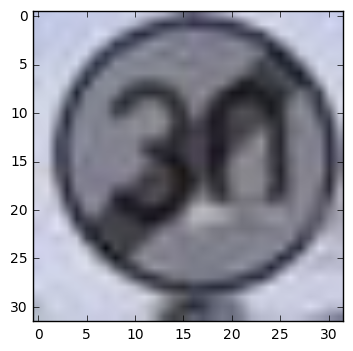

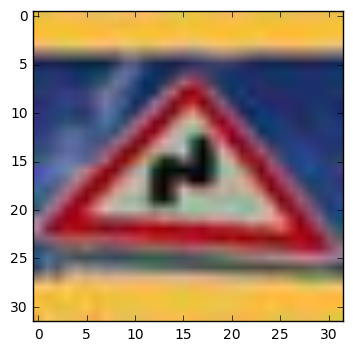

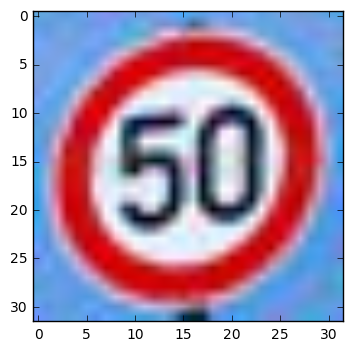

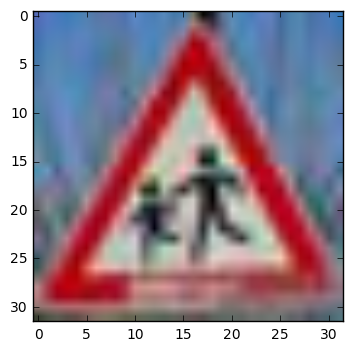

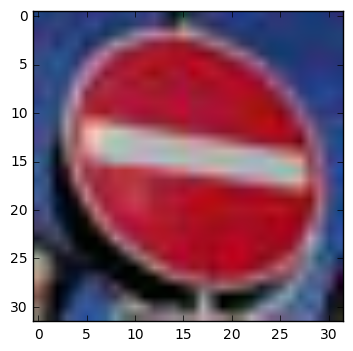

In [11]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import matplotlib.image as mpimg

images_set=[]
for i in range(1,6):    
    img=mpimg.imread('downloaded_traffic_signs/{}_32.jpg'.format(i))
    images_set.append(img)
    plt.figure(i)
    imgplot = plt.imshow(img)
    

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

The images are not particularly different from the data set but couple of them do have some view angle to them in the sense that the image was taken from a different angle instead of right in front of the sign offering some skew paramter.

In [13]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    loader = tf.train.import_meta_graph('lenet.meta')
    loader.restore(sess, tf.train.latest_checkpoint('.'))
    
    new_prediction = sess.run(prediction, feed_dict={x: images_set})
    
    for i in range(0,5):
        print(np.argmax(new_prediction[i]))

1
20
2
28
17


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

The model performed very well on the test pictures getting all of them right in most cases giving us an accuracy between 80% & 100%. The reason it is either 80% or 100% is because of the first image of 30km/hr that has the slash on it. In few cases the network identified as 30km/hr and in some cases as "End of all speed and passing limits" which in one sense correct but the network was not too sure which one is correct as it gives different results everytime the images are tested.

Conclusion: Accuracy 80%

In [20]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

#print(new_prediction)

with tf.Session() as sess:
    values, indices = sess.run(tf.nn.top_k(new_prediction, k=5))
    print(values, indices)

[[  9.99861836e-01   1.37407726e-04   6.23289566e-07   1.24564508e-07
    1.04751621e-08]
 [  5.26040256e-01   3.02362949e-01   9.56138074e-02   3.27968933e-02
    1.65557507e-02]
 [  1.00000000e+00   4.48716551e-14   4.28611174e-14   3.69098450e-22
    1.22070158e-28]
 [  1.00000000e+00   3.06059444e-25   1.70755568e-26   6.39997258e-28
    2.24236983e-30]
 [  9.89593267e-01   1.04034683e-02   2.00989666e-06   1.30279318e-06
    2.60454228e-11]] [[ 1  2  4 14 17]
 [20 28 40 16  7]
 [ 2  1  3  5  4]
 [28 23 13 30 29]
 [17 21  1 14 29]]


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

For # 1 - image of 30km/hr with a slash
top 3 predictions are (1) 30km/hr (99% probability) or (2) 50km/hr or (4) 70km/hr. Clearly 30km/hr makes sense.

For # 2 - image of dangerous curve on the right
top 3 - (20) Dangerous curve to the right, (52.6% probability) (28) children crossing (30% probability) and (40) Roundabout mandotory. (20) makes sense

For # 3 - image of 50km/hr
top 3 - (2) 50km/hr (~100% probability), (1)30km/hr and (3)60km/hr. (2) makes sense

For # 4 - image of children crossing
top 3 - (28) children crossing (~100% probability),  (23) slippery road, (13) yeild. 

For # 5 - image of no entry
top 3 - (17)No entry (98.9% probability),  (21)double curve and (1) 30km/hr

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.